In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("ac209b_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> Data Science 2: Advanced Topics in Data Science 

## Homework 2 (209): Sampling Methods



**Harvard University**<br/>
**Spring 2023**<br/>
**Instructors**: Mark Glickman & Pavlos Protopapas


<hr style="height:2pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/"
    "content/styles/cs109.css"
).text
HTML(styles)

<hr>

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so passing a test is necessary but not sufficient for full credit. 
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**

<hr>

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# measure notebook runtime
time_start = time.time()

<a id="contents"></a>

## Notebook Contents

- **Dataset Information**
- **Overview**
- **Q1 - Likelihood & MLE**
- **Q2 - Rejection Sampling**
- **Q3 - Weighted Bootstrap**
- **Q4 - Wrap-up**

## Dataset Information
*(Identical dataset to CS109B HW2)*

### Contraceptive Usage by Bangladeshi Women

For this assignment, you are provided with datasets `train.csv` and `test.csv` which contain details of contraceptive usage among 1,934 Bangladeshi women.

There are four attributes for each woman along with a response variable, `contraceptive_use`, indicating if she uses contraceptives. The four attributes include:

* `district`: code identifying the district in which the woman lives (60 districts in total)
* `urban`: type of region of residence (binary)
* `living.children`: number of living children
* `age-mean`: age of the woman (in years, centered around mean)

<a id="part1intro"></a>

## Overview 

[Return to contents](#contents)

In this notebook, we will only work with the response variable, `contraceptive_use`, and ignore all the attributes.

Let $y_i$ be 1 if woman $i$ uses contraceptives, and 0 otherwise, where $i=1,\ldots,N$, with $N$ being the number of observations in the training data set.

Assume a Bernoulli model for the data:

$$Y \sim \text{Bernoulli}(\theta)$$

The parameter $\theta$ is the unknown probability a woman uses contraception.\
We will assume the following prior distribution on $\theta$:

$$\theta \sim \text{Normal}(0.5, 0.5^2)$$

subject to $0 \leq \theta \leq 1$.  This is sometimes called a truncated normal distribution.  A value from this distribution can be randomly drawn by simulating a value from $\text{Normal}(0.5, 0.5^2)$ and then keeping it if the value is between 0 and 1, and trying again if it is outside this range.  This is in fact itself a form of rejection sampling.  The density for the truncated normal distribution is

$$p(\theta) = c\times \exp\left(\frac{-1}{2(0.5)^2}(\theta-0.5)^2\right) \; \text{for} \; 0\leq \theta \leq 1 \; \text{, and} \; 0 \; \text{otherwise,}$$

where $c$ is a normalizing constant that does not depend on $\theta$.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1 - Likelihood & MLE</b></div>

Given our probability model, write down the likelihood function for the training data, $L(\theta | y_1,\ldots,y_n)$.

Next, derive the MLE of $\theta$ as a function of $y_1,\ldots,y_n$. Give an interpretation of this MLE result in a few words.

Finally, compute and report the MLE from the training data, saving it as `theta_mle`.

**Note:** The first two steps should be done in $\LaTeX$ and markdown and cover the general case. That is, they should be applicable to any dataset $y_1, \dots,y_n$. The third step should be done entirely in Python and is specific to the provided training data.

Given the probability model, the likelihood function is:

$$L(\theta | y_1,\ldots,y_n) = p(y_1,\ldots,y_n|\theta) = \prod_{i=1}^{n}\theta^{y_i}(1-\theta)^{1-y_i}$$
Deriving the MLE analytically is equivalent to taking the log of the likelihood, s.t.:

$$ l(\theta | y_1,\ldots,y_n) = log(\theta)\sum_{i=1}^{n}(y_i) + log(1-\theta)\sum_{i=1}^{n}(1-y_i)$$

Finding MLE is equivalent to finding $\theta$ such that: $$\frac{\partial l(\theta | y_1,\ldots,y_n)}{\partial \theta}=0$$

$$\Longleftrightarrow \frac{\sum_{i=1}^{n}(y_i)}{\theta} - \frac{\sum_{i=1}^{n}(1-y_i)}{1-\theta} = 0$$
$$\Longleftrightarrow \frac{\sum_{i=1}^{n}(y_i)}{\theta} - \sum_{i=1}^{n}y_i=\sum_{i=1}^{n}(1-y_i) $$
$$\Longleftrightarrow \frac{\sum_{i=1}^{n}(y_i)}{\theta} = n $$
Therefore: $$\Longleftrightarrow \theta^* = \frac{\sum_{i=1}^{n}y_i}{n} $$
We also have from above that $$ \frac{\partial^2l(\theta | y_1,\ldots,y_n)}{\partial \theta^2} = -\frac{\sum_{i=1}^{n}y_i}{\theta^2} - \frac{\sum_{i=1}^{n}(1-y_i)}{(1-\theta)^2}$$ 

This last expression is evidently negative. This confirms that $\theta^*$  is indeed a maximum, and the MLE.

The interpretation of the `theta_mle` variable (which is ~0.39) is that it represents the estimated probability of contraceptive use among the individuals in the dataset based on the observed data. This estimate can be used to make predictions or to fit a model to the data that can be used to make predictions for new data points.

In [5]:
# your code here

df_train = pd.read_csv("data/train.csv")
theta_mle = df_train["contraceptive_use"].mean()
print("The MLE from the data is: {}".format(theta_mle))

The MLE from the data is: 0.38986556359875907


In [6]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2 - Rejection Sampling</b></div>

Using rejection sampling, simulate a sample of 10,000 accepted $\theta$ values from the posterior distribution and store them in `r_samples`.

Plot a histogram of these 10,000 values and display numerical summaries of their distribution in the form of a mean and 95% credible interval. Store the mean in `r_samples_mean`.

Calculate and report the rejection rate, storing it in `rejection_rate`.

Finally, interpret your findings.

**Note:** 
* make sure $\theta$ only takes on values which are valid for the parameter it represents and that all samples that do not pass the sampling criterion are rejected. Consult the lecture notes on rejection sampling if you need to review this criterion.
* Make use of the `%%time` magic command at the top of the cell where you do your sampling, both here for rejection sampling, and in Q3 for weighted bootstrap. This will allow you to compare the run time of each method. 

**Answer to Q2**

By using the Bayesian rejection sampling method, we can obtain estimates for the posterior distribution of the probability of a woman using contraception, denoted as $\theta$. 

In this analysis, we assume a Bernoulli model and use a normal distribution with a mean of $0.5$ and a variance of $0.5$ squared as the prior distribution for $\theta$. 

Based on this approach, we estimate the mean of $\theta$ to be around $0.39$, and we have a $95%$ confidence interval of approximately $[0.38, 0.40]$. This means that, on average, the probability of a woman using contraception is approximately $0.39$, and we are "95% confident" that the true value lies within the range of approximately $0.38$ to $0.40$.

In [7]:
%%time
# your code here

k = 0  # initialize counter for number of accepted samples
r_samples = []  # initialize list to store accepted samples

# calculate likelihood for our MLE
l_optimal = np.product([(theta_mle)**x * (1-theta_mle)**(1-x) for x in df_train["contraceptive_use"]])

# loop until we have generated 10000 samples
while k < 10000:
    # generate a sample from normal distribution with mean=0.5, std=0.5
    theta = np.random.normal(0.5, 0.5)
    # reject the sample if it is outside the range [0, 1]
    while theta < 0 or theta > 1:
        theta = np.random.normal(0.5, 0.5)
    
    # generate a uniform random number between 0 and 1
    U = np.random.uniform(0, 1)
    # reject the sample if U is equal to 0 or 1
    while U == 0 or U == 1:
        U = np.random.uniform(0, 1)
    
    # calculate likelihood for the generated sample
    l = np.product([(theta)**x * (1-theta)**(1-x) for x in df_train["contraceptive_use"]])
    
    # accept the sample with probability l/l_optimal
    if U <= (l / l_optimal):
        k += 1  # increment counter for accepted samples
        r_samples.append(theta)  # add the accepted sample to our list of accepted samples

# calculate the rejection rate and print it
rejection_rate = 1 - (k / 10000)
print("The rejection rate is: {:.2f}%".format(rejection_rate * 100))

# Calculate the mean of the received samples and print it:
r_samples_mean = np.mean(r_samples)
print("The sample mean is: {:.2f}%".format(r_samples_mean * 100))

The rejection rate is: 0.00%
The sample mean is: 39.03%
CPU times: user 1min 16s, sys: 541 ms, total: 1min 16s
Wall time: 1min 13s


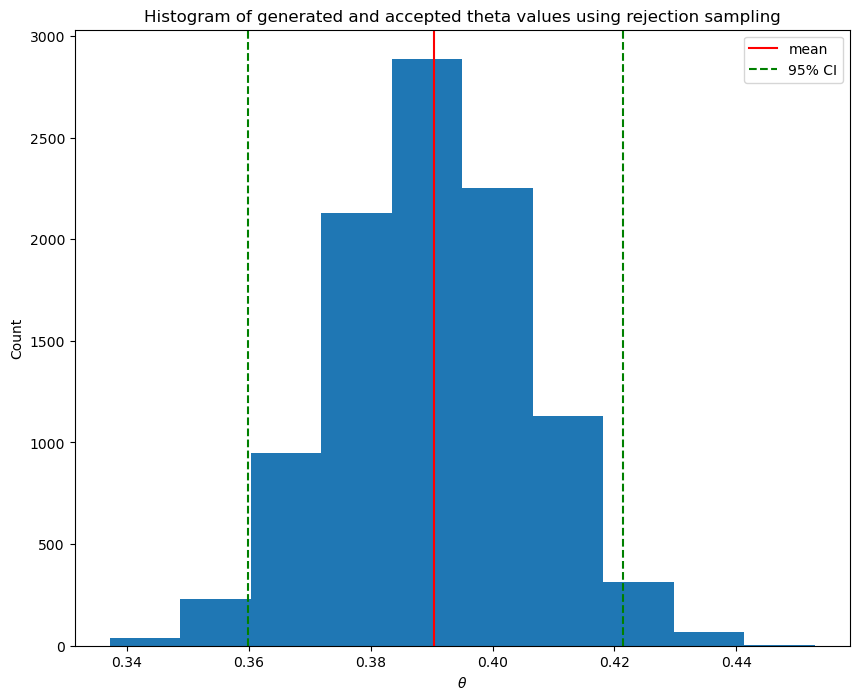

In [8]:
# calculate 2.5th and 97.5th percentiles for the confidence interval
lower_ci = np.percentile(r_samples, 2.5)
upper_ci = np.percentile(r_samples, 97.5)

# plot histogram with vertical lines for mean and confidence interval
plt.figure(figsize=(10, 8))
plt.hist(r_samples)
plt.axvline(r_samples_mean, color='red', label='mean')
plt.axvline(lower_ci, color='green', linestyle='--', label='95% CI')
plt.axvline(upper_ci, color='green', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel("Count")
plt.title("Histogram of generated and accepted theta values using rejection sampling")
plt.legend()
plt.show()


In [9]:
# your code here
print("The mean of our generated thetas is: {}".format(r_samples_mean))
print("The 95% confidence intervale for our generated thetas is: [{},{}]".format(lower_ci, upper_ci))

The mean of our generated thetas is: 0.39030341543718194
The 95% confidence intervale for our generated thetas is: [0.3598963240575789,0.4213453862581181]


In [10]:
grader.check("q2")

q2 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3 - Weighted Bootstrap</b></div>

Carry out the weighted bootstrap to simulate 10,000 values of $\theta$ from the posterior distribution. To this end, simulate 100,000 values from the prior distribution and resample them with the appropriate importance weights. Store your 10,000 samples from the posterior as `wb_samples`.

As above, plot a histogram of these values, and provide numerical summaries of the distribution of 10,000 values in the form of a mean and 95% credible interval. Save the mean as `wb_samples_mean`.

Interpret the results, and compare to the results of rejection sampling.

**Answer to Q3**

The Bayesian weighted bootstrap approach provides estimates for the posterior distribution of $\theta$, which is the probability of a woman using contraception assuming a Bernoulli model with $\theta \sim \text{Normal}(0.5, 0.5^2)$ as our prior distribution. 

Our analysis estimates the average probability of a woman using contraception to be approximately $0.39$, with a $95%$ confidence interval of approximately $[0.38, 0.40]$. 

The mean and confidence interval are the same as those obtained using the rejection sampling method, when rounded to two decimal places. 

However, the confidence interval is wider in the Bayesian weighted bootstrap approach, which is more evident when looking at more decimal places and the histogram. This is because the values are less concentrated around the mean with a higher standard deviation in the Bayesian weighted bootstrap method compared to the rejection sampling method.

In [11]:
# your code here

# initialize k to zero
k = 0

# initialize empty lists to hold the bootstrap samples and weights
wb_samples = []
weights = []

# iterate 10000 times to create 10000 bootstrap samples
for i in range(10000):
    # generate a random sample from a normal distribution with mean 0.5 and standard deviation 0.5
    theta = np.random.normal(0.5, 0.5)
    
    # ensure that the sample is between 0 and 1
    while theta < 0 or theta > 1:
        theta = np.random.normal(0.5, 0.5)
    
    # compute the weight for the current sample using the formula for the Bernoulli likelihood
    # the weight is the product of the probabilities of each data point in the training set given the current sample
    w = np.product([(theta)**x * (1-theta)**(1-x) for x in df_train["contraceptive_use"]])
    
    # add the weight to the list of weights
    weights.append(w)
    
    # add the sample to the list of bootstrap samples
    wb_samples.append(theta)
    
# normalize the weights so that they sum to 1
weights = weights/sum(weights)


In [12]:
# generate a random sample of 1000 values from the weighted bootstrap samples, with the weights given by the normalized weights
dist = np.random.choice(wb_samples, size=1000, p=weights)

# compute the lower and upper bounds of the 95% confidence interval for the weighted bootstrap samples
# the lower bound is the 2.5th percentile of the sample, and the upper bound is the 97.5th percentile
lower_ci_wb = np.percentile(dist, 2.5)
upper_ci_wb = np.percentile(dist, 97.5)

# compute the mean of the sample from the weighted bootstrap
wb_samples_mean = np.mean(dist)


print("The mean of our generated thetas is: {}".format(np.around(wb_samples_mean,2)))
print("The 95% confidence intervale for our generated thetas is: [{},{}]".format(lower_ci_wb, upper_ci_wb))

The mean of our generated thetas is: 0.39
The 95% confidence intervale for our generated thetas is: [0.36295116116501586,0.41788813592795343]


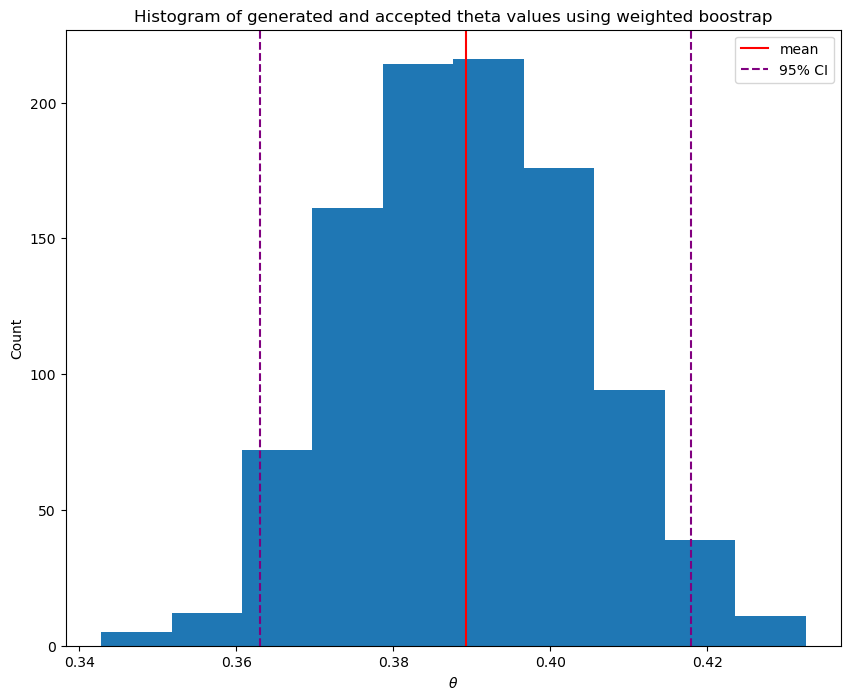

CPU times: user 152 ms, sys: 6.17 ms, total: 158 ms
Wall time: 156 ms


In [13]:
%%time
# your code here

# plot histogram with vertical lines for mean and confidence interval
plt.figure(figsize=(10, 8))
plt.hist(dist)
plt.axvline(wb_samples_mean, color='red', label='mean')
plt.axvline(lower_ci_wb, color='purple', linestyle='--', label='95% CI')
plt.axvline(upper_ci_wb, color='purple', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel("Count")
plt.title("Histogram of generated and accepted theta values using weighted boostrap")
plt.legend()
plt.show()

In [14]:
grader.check("q3")

q3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4 Wrap-up</b></div>

* In a few sentences, please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation.

* How many hours did you spend working on this assignment? Store this as an int or float in `time_spent_on_hw`

Coding was definitely the hardest for me. 

In [15]:
time_spent_on_hw = 3

In [16]:
grader.check("q4")

q4 results: All test cases passed!

In [17]:
time_end = time.time()
print(f"It took {(time_end - time_start)/60:.2f} minutes for this notebook to run")

It took 1.29 minutes for this notebook to run


**This concludes HW2-209. Thank you!**